(792, 569)


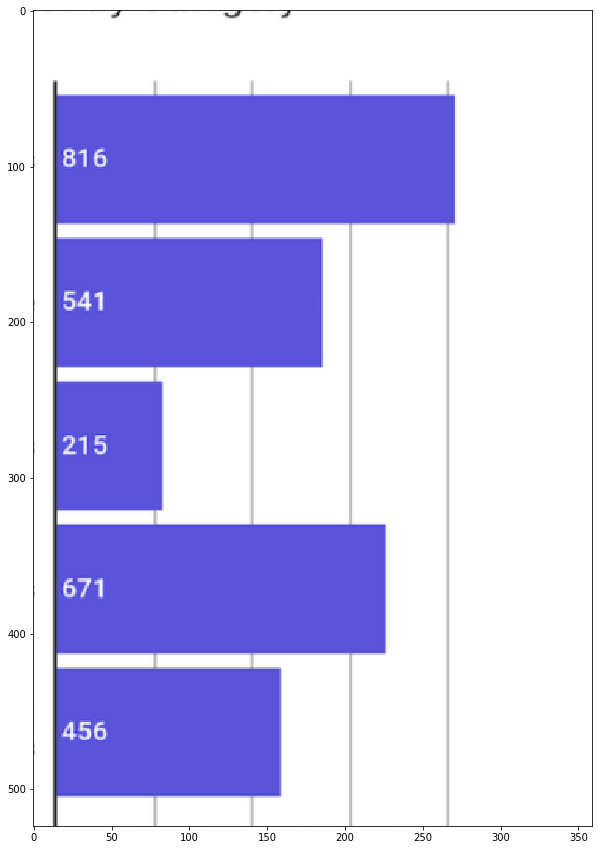

In [74]:
%matplotlib inline
from matplotlib import pyplot as plt
import cv2
def get_image(filename):
    return cv2.imread(filename)

plt.rcParams['figure.figsize'] = [20, 15]
img=cv2.imread('barchart.png')
print(img.shape[:2])
img_neg=cv2.bitwise_not(img)
plt.imshow(img[45:569,210:792])

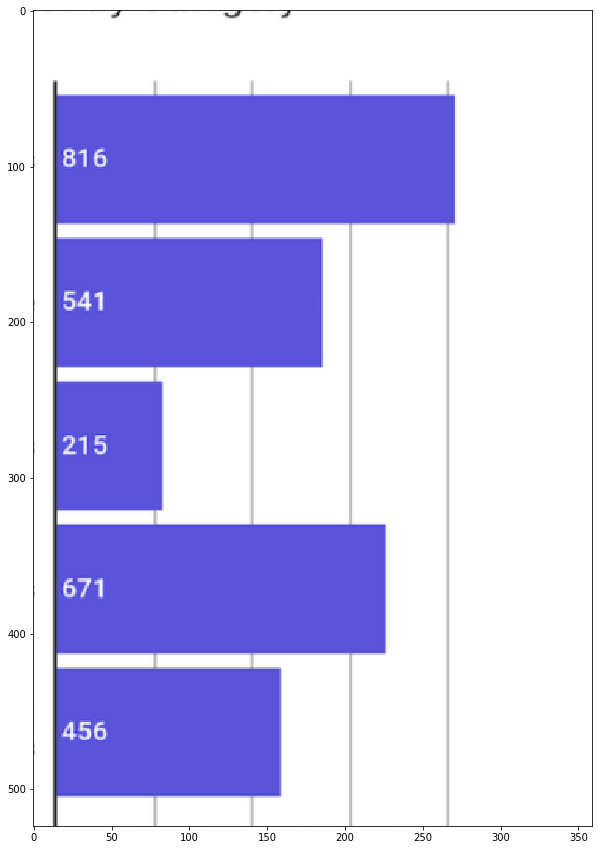

In [75]:
import pytesseract
from pytesseract import Output
#img=cv2.imread('barchart_only.png')
#img=cv2.bitwise_not(img)
def get_data(img):
    return pytesseract.image_to_data(img, output_type=Output.DICT)

def get_texts(img):
    data = get_data(img)
    texts=[]
    n = len(data['text'])
    for i in range(n):
        if len(data['text'][i].strip())==0:
            continue
        comp = {
                    'text':data['text'][i],
                     'x_start':data['left'][i],
                     'x_end': data['left'][i]+data['width'][i],
                     'y_start':data['top'][i],
                     'y_end':data['top'][i]+data['height'][i],
               }
        texts.append(comp)
    return texts

def get_bargraph_boundaries(img):
    x_start,y_start = 0,0
    x_end, y_end = img.shape[:2]
    texts = get_texts(img)
    #find the topmost text and the start of the x-axis
    topmost={'y_end':y_end+1}
    for text in texts:
        if text['y_end']<topmost['y_end']:
            topmost=text
    #boundary of the xaxis and yaxis labels
    yaxis=None
    xaxis=None
    for text in texts:
        if xaxis is None and text['text'].isnumeric():
            xaxis = text
        if yaxis is None and not text['text'].isnumeric():
            if text['y_start']>topmost['y_end']:
                yaxis = text
    y_start = max(y_start,topmost['y_end'])
    x_start = max(x_start,yaxis['x_end'])
    y_end = min(y_end, xaxis['y_start'])
    return {'x_start':x_start,'y_start':y_start,'y_end':y_end,'x_end':x_end}

bb = get_bargraph_boundaries(img)

def get_bar_coords(bargraph):
    gray = cv2.cvtColor(bargraph, cv2.COLOR_BGR2GRAY)
    gray_image = cv2.convertScaleAbs(gray)
    ret,thresh = cv2.threshold(gray,127,255,1)
    _,contours,_ = cv2.findContours(thresh,1,2)
    for cnt in contours:
        approx = cv2.approxPolyDP(cnt,1.2*cv2.arcLength(cnt,True),True)
        if len(approx)==4:
            print("square")
            cv2.drawContours(bargraph,[cnt],0,(0,0,255),-1)
            print(cnt)
    plt.imshow(bargraph)
    return None

get_bar_coords(img[bb['y_start']:bb['y_end'],bb['x_start']:bb['x_end']])


### 